# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay, mean_squared_error, r2_score
from mlxtend.plotting import plot_decision_regions
from threadpoolctl import threadpool_limits

# Loading the data

In [2]:
diabetes = pd.read_csv("diabetes.csv")
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

# Data Normalization

In [3]:
X_vis = X[["BMI", "Glucose"]]
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Data Splitting

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# K-means Clustering Model

In [5]:
# K-means Clustering Model
with threadpool_limits(limits=3):
  # Creating the K-means model with 2 clusters
  kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)

  # Fitting the model on the two features
  kmeans.fit(X_vis)

Cluster centers: 
 [[ 30.77300971 102.97087379]
 [ 34.47509881 157.37944664]]
Mean squared error: 0.26
Coefficient of determination: -0.14


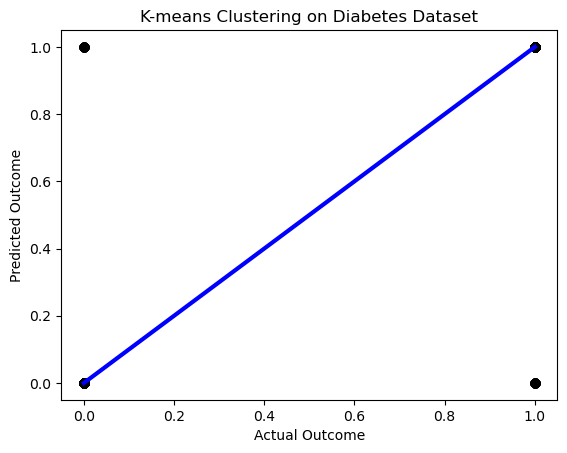

In [6]:
y_pred = kmeans.predict(X_vis)
print("Cluster centers: \n", kmeans.cluster_centers_)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))
plt.scatter(y, y_pred, color="black")
plt.plot([0, 1], [0, 1], color="blue", linewidth=3)
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.title("K-means Clustering on Diabetes Dataset")
plt.show()

# Confusion Matrix of K-means Clustering on Diabetes Dataset

Confusion matrix: 
 [[408  92]
 [107 161]]


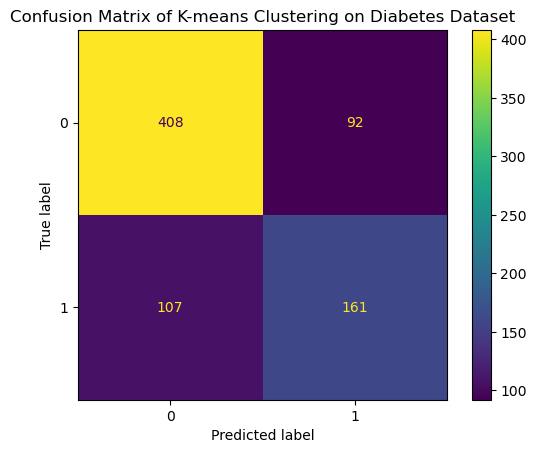

In [7]:
cm = confusion_matrix(y, y_pred)
print("Confusion matrix: \n", cm)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix of K-means Clustering on Diabetes Dataset")
plt.show()

# ROC Curve of K-means Clustering on Diabetes Dataset

ROC AUC: 0.71


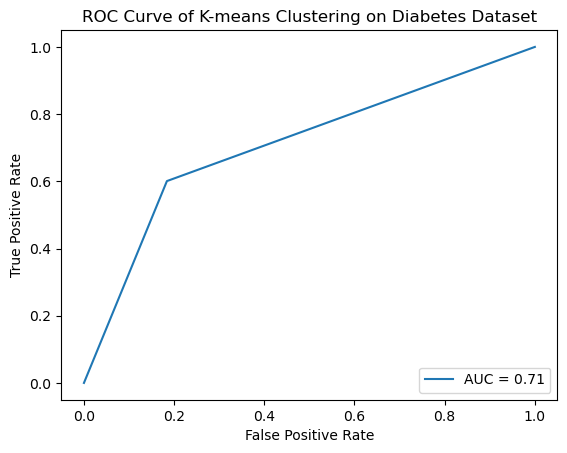

In [8]:
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC: %.2f" % roc_auc)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title("ROC Curve of K-means Clustering on Diabetes Dataset")
plt.show()

# Decision Regions for K-means Clustering

C:\Users\Jinius\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


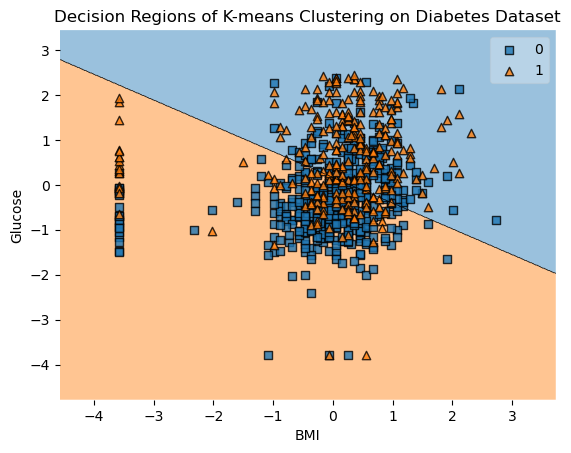

In [9]:
X_vis = X[:, [2, 1]] # BMI and Glucose features
kmeans.fit(X_vis, y)
plot_decision_regions(X=X_vis, y=y.values, clf=kmeans)
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.title("Decision Regions of K-means Clustering on Diabetes Dataset")
plt.show()

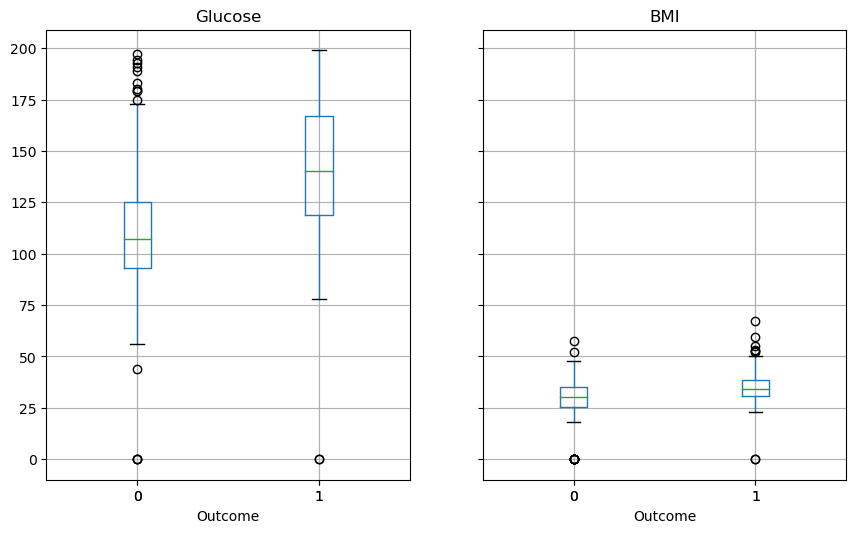

In [10]:
# Adding some tables and figures based on Glucose and BMI
# Table of descriptive statistics for Glucose and BMI by outcome
diabetes.groupby("Outcome")[["Glucose", "BMI"]].describe()
# Figure of boxplots for Glucose and BMI by outcome
diabetes.boxplot(column=["Glucose", "BMI"], by="Outcome", figsize=(10, 6))
plt.suptitle("")
plt.show()

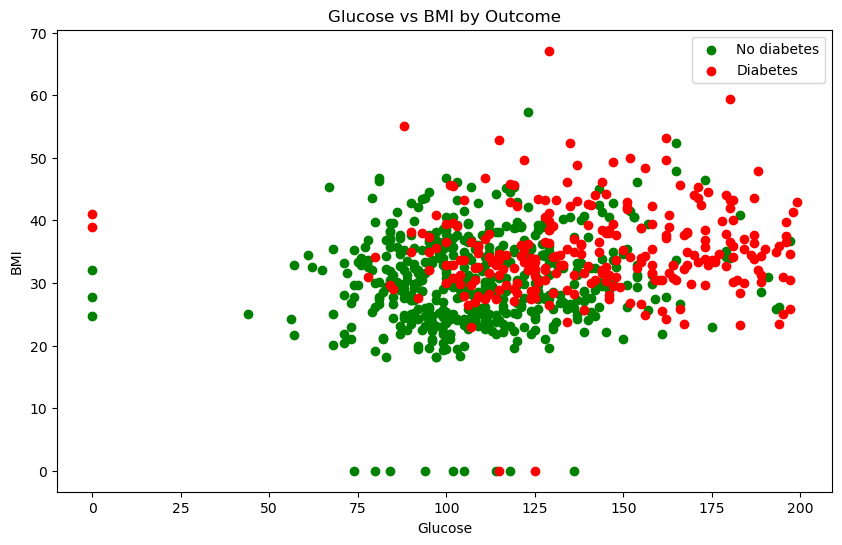

In [11]:
# Figure of scatter plot for Glucose vs BMI by outcome
plt.figure(figsize=(10, 6))
plt.scatter(diabetes[diabetes["Outcome"] == 0]["Glucose"], diabetes[diabetes["Outcome"] == 0]["BMI"], label="No diabetes", color="green")
plt.scatter(diabetes[diabetes["Outcome"] == 1]["Glucose"], diabetes[diabetes["Outcome"] == 1]["BMI"], label="Diabetes", color="red")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend()
plt.title("Glucose vs BMI by Outcome")
plt.show()